In [41]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [42]:
df_DK = df[df["job_country"] == "Denmark"].dropna(subset=["salary_year_avg"])


In [44]:
job_titles=df_DK['job_title_short'].sort_values().value_counts().index[:4].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Machine Learning Engineer']

In [45]:
df_DK_top6=df_DK[df_DK['job_title_short'].isin(job_titles)]

In [46]:
job_order = (
    df_DK_top6.groupby("job_title_short")["salary_year_avg"]
    .median()
    .sort_values(ascending=False)
    .index
)

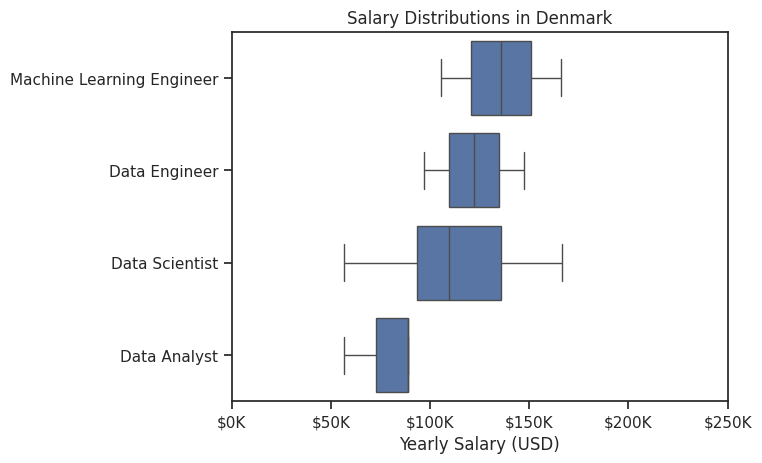

In [52]:
sns.boxplot(data=df_DK_top6, x='salary_year_avg', y='job_title_short',order=job_order)
sns.set_theme(style='ticks')

# this is all the same
plt.title('Salary Distributions in Denmark')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 250000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [55]:
df_DE_DK=df[(df['job_title_short']=='Data Engineer') & (df['job_country']=='Denmark')].copy()
df_DE_DK=df_DE_DK.dropna(subset=['salary_year_avg'])

In [56]:
df_DE_DK=df_DE_DK.explode('job_skills')

In [62]:
df_DE_top_pay = (
    df_DE_DK.groupby("job_skills")["salary_year_avg"]
    .agg(["count", "median"])
    .sort_values(by="median", ascending=False)
)

df_DE_top_pay=df_DE_top_pay.head(10)
df_DE_top_pay

,count,median
job_skills,,
jenkins,1,147500.0
sap,1,147500.0
oracle,1,147500.0
spark,1,147500.0
sql,2,122136.5
linux,1,96773.0
aws,1,96773.0
python,1,96773.0
phoenix,1,96773.0


,count,median
job_skills,,
jenkins,1,147500.0
sap,1,147500.0
oracle,1,147500.0
sql,2,122136.5
aws,1,96773.0
linux,1,96773.0
phoenix,1,96773.0
nosql,1,96773.0
python,1,96773.0


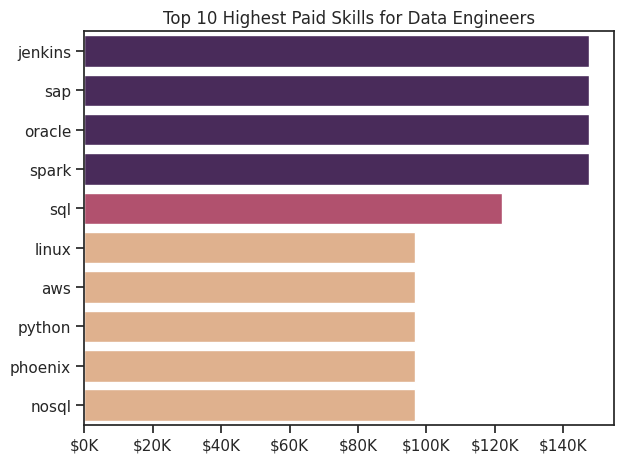

In [ ]:
ax=plt.gca()

sns.set_theme(style='ticks')

sns.barplot(data=df_DE_top_pay, x='median', y=df_DE_top_pay.index, hue='median', ax=ax, palette='flare')
ax.legend().remove()

ax.set_title('Top 10 Highest Paid Skills for Data Engineers')
ax.set_ylabel('')
ax.set_xlabel('')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()